In [4]:
import torch.nn as nn
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.optim as optim
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [25]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784,100)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(100,100)
        self.fc3 = nn.Linear(100,10)
        
    def forward(self, x):
        x1 = self.fc1(x)
        x2 = self.relu(x1)
        x3 = self.fc2(x2)
        x4 = self.relu(x3)
        x5 = self.fc3(x4)
            
        return x5
        
    
        
        

In [26]:
download_root = './MNIST_data'
dataset1 = datasets.MNIST(root = download_root,
                    train=True,
                    transform = transforms.ToTensor(),
                    download=True)

In [27]:
dataset2 = datasets.MNIST(root=download_root,
                    train=False,
                    transform = transforms.ToTensor(),
                    download=True)

In [28]:
batch_s = 100
# training dataset : dataset1_loader의 len은 600
# test dataset : dataset2_loader의 len은 100
dataset1_loader = DataLoader(dataset1, batch_size = batch_s)
dataset2_loader = DataLoader(dataset2, batch_size = batch_s)

In [29]:
model_dict = {}
loss_dict = {}
accuracy_dict = {}
# optimizer에 따른 학습 정도를 살펴볼 4가지 테스트 케이스
optimizer_case = ['SGD','Adam','AdaGrad','RMSprop']
for key in optimizer_case:
    model_dict[key] = Net()
    loss_dict[key] = []
    accuracy_dict[key] = []

In [30]:
# 4가지 테스트케이스에 대한 optimizer 정의
optimizer_dict = {}
optimizer_dict['SGD'] = optim.SGD(model_dict['SGD'].parameters(),lr = 0.001 )
optimizer_dict['Adam'] = optim.Adam(model_dict['Adam'].parameters(),lr= 0.001)
optimizer_dict['AdaGrad'] = optim.Adagrad(model_dict['AdaGrad'].parameters(), lr=0.001)
optimizer_dict['RMSprop'] = optim.RMSprop(model_dict['RMSprop'].parameters(),lr=0.001)

In [31]:
# loss_function, total batch size, epoch 정의
loss_function = nn.CrossEntropyLoss()
total_batch = len(dataset1_loader) # 600 (60000 / 100) => (train dataset / batch_size)
epochs = np.arange(1,16)

SGD
epoch : 1 | loss : 0.450588
Accuracy : 88.29
epoch : 2 | loss : 0.442181
Accuracy : 88.42
epoch : 3 | loss : 0.434453
Accuracy : 88.61
epoch : 4 | loss : 0.427322
Accuracy : 88.69
epoch : 5 | loss : 0.420720
Accuracy : 88.79
epoch : 6 | loss : 0.414588
Accuracy : 88.90
epoch : 7 | loss : 0.408877
Accuracy : 88.99
epoch : 8 | loss : 0.403545
Accuracy : 89.12
epoch : 9 | loss : 0.398552
Accuracy : 89.26
epoch : 10 | loss : 0.393865
Accuracy : 89.33
epoch : 11 | loss : 0.389455
Accuracy : 89.45
epoch : 12 | loss : 0.385294
Accuracy : 89.55
epoch : 13 | loss : 0.381358
Accuracy : 89.64
epoch : 14 | loss : 0.377625
Accuracy : 89.73
epoch : 15 | loss : 0.374077
Accuracy : 89.74


ValueError: x and y must have same first dimension, but have shapes (15,) and (30,)

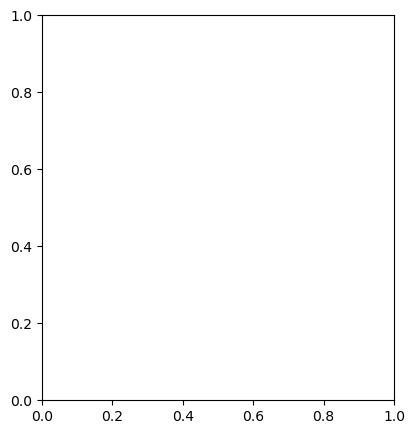

In [42]:
# 총 4가지 optimizer를 사용하여 학습
for optimizer_name, optimizer in optimizer_dict.items():
    print(optimizer_name)
    for epoch in epochs:
        cost=0
        for images, labels in dataset1_loader: #dataloader는 image와 label로 구성
            # 하나의 Tensor에 데이터 784(28x28)개가 담긴 리스트가 100개 들어있음
            # 그리고 그것이 총 dataset1_loader의 len인 600개 존재
            images = images.reshape(100,784)
            
            model_dict[optimizer_name].zero_grad()
            
            # feed forward
            predict = model_dict[optimizer_name].forward(images)
            # loss 값 구하기
            loss = loss_function(predict,labels) # 예측된 것과 label이 얼마나 차이가 나는지
            # back propagation
            loss.backward()
            # optimizer update
            optimizer.step()
            cost += loss # 총 600번의 loss를 더한다.
            
        with torch.no_grad(): # 추론 시 미분하지 않겠다
            total = 0
            correct = 0
            for images, labels in dataset2_loader:
                images = images.reshape(100,784)
                outputs = model_dict[optimizer_name].forward(images)
                
                # torch.max에서 두 번째 인자는 dim을 의미
                # 1로 지정했다는 것은 하나의 행에서 가장 큰 값을 찾겠다는 것
                # dim을 지정하면 인덱스에 있는 값과 인덱스를 반환
                _,predict = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predict == labels).sum() # 예측한 것과 labels이 얼마나 일치하는지
            avg_cost = cost / total_batch # loss 값 600개의 평균
            accuracy = 100 * (correct/total)
            loss_dict[optimizer_name].append(avg_cost.detach().numpy())
            accuracy_dict[optimizer_name].append(accuracy)
            print("epoch : {} | loss : {:.6f}" .format(epoch, avg_cost))
            print("Accuracy : {:.2f}".format(100*correct/total))
    
    

ValueError: x and y must have same first dimension, but have shapes (15,) and (30,)

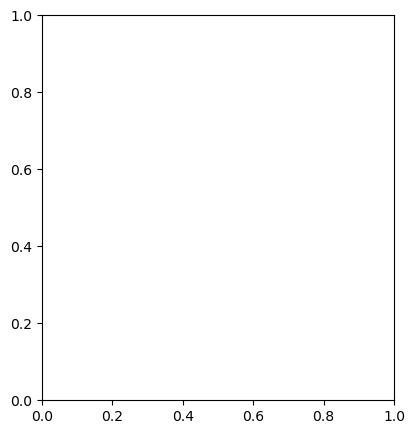

In [43]:
markers = {'SGD' : 'o', 'Adam' : 'x','AdaGrad' : 's','RMSprop' : 'D' }
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
    
for key in optimizer_case:
    plt.plot(epochs,loss_dict[key], marker = markers[key], markevery=100, label = key)
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.legend() 
    
    
plt.subplot(1,2,2)
for key in optimizer_case:
    plt.plot(epochs, accuracy_dict[key],marker = markers[key], markevery=100, label=key)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()